# Avance del proyecto
### Detección de Automobiles Mediante AUV Basado en Transfer learning
### Reconocimiento de X & y 

In [1]:
'''Librerias'''
import h5py
import cv2
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization,Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras import regularizers, optimizers
from keras.regularizers import l2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
'''Testeo de datos'''
test_size    = 0.20
seed         = 6
h5_color     = 'C:/Users/Junior/Desktop/Proyecto mineria/Features_Data/color_features.h5'
h5_colorLb   = 'C:/Users/Junior/Desktop/Proyecto mineria/Features_Data/color_features_labels.h5'
h5_texture   = 'C:/Users/Junior/Desktop/Proyecto mineria/Features_Data/textural_features.h5'
h5_textureLb = 'C:/Users/Junior/Desktop/Proyecto mineria/Features_Data/textural_features_labels.h5'
scoring      = {'accuracy' : make_scorer(accuracy_score),
                'f1_score' : make_scorer(f1_score, average = 'weighted'), 
                'precision' : make_scorer(precision_score, average = 'weighted'),
                'recall' : make_scorer(recall_score, average = 'weighted')}

In [3]:
'''Normalización'''

'''importar el vector de características y las etiquetas entrenadas'''

h5f_color   = h5py.File(h5_color, 'r')
h5f_colorLb = h5py.File(h5_colorLb, 'r')

color_features_string          = h5f_color['Vehicle_Color_Features']
color_features_labels_string   = h5f_colorLb['Vehicle_Color_Features_Labels']

color_features = np.array(color_features_string)
color_features_labels  = np.array(color_features_labels_string)

h5f_color.close()
h5f_colorLb.close()

'''verificar la forma del vector de características y las etiquetas'''

print("[STATUS] features shape: {}".format(color_features.shape))
print("[STATUS] labels shape: {}".format(color_features_labels.shape))
print("[STATUS] training started...")

'''Dividir X & y'''
x = global_features
Y = color_features_labels

[STATUS] features shape: (2400, 4512)
[STATUS] labels shape: (400, 512)
[STATUS] training started...


In [4]:
'''Dividir X & y'''
x = global_features
Y = color_features_labels

# MobileNetV2

In [5]:
'''Librerias para MobileNet'''
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

from keras.preprocessing.image import ImageDataGenerator
from keras.applications import MobileNetV2
from keras.layers import AveragePooling2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input
from keras.models import Model
from keras.optimizers import Adam
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import model_from_json
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import glob
import numpy as np

In [6]:
'''Definicion de '''
x_train, x_test, y_train, y_test = train_test_split(x, Y,
                                        test_size   = test_size,
                                        random_state = seed)

x_train.shape,x_test.shape

(x_train, x_valid) = x_train[2000:], x_train[:2000]
(y_train, y_valid) = y_train[2000:], y_train[:2000]

#print the shape of x_train, x_valid, and x_test

print('x_train =', x_train.shape)
print('x_valid =', x_train.shape)
print('x_test =', x_train.shape)

x_train = (4500, 32, 32, 3)
x_valid = (4500, 32, 32, 3)
x_test = (4500, 32, 32, 3)


In [7]:
'''Verificación datos de entrada y etiquetas correspondientes'''
for image_path in dataset_paths:
  label = image_path.split(os.path.sep)[-2]
  image=load_img(image_path,target_size=(80,80))
  image=img_to_array(image)

'''Impresión de datos'''
print("[INFO] Find {:d} images with {:d} classes".format(len(X),len(set(labels))))

'''guardar el archivo de etiqueta para que podamos usarlo en otro script'''
np.save('license_character_classes.npy', lb.classes_)

[INFO] Find 5.567 images with 3 classes


In [8]:
'''Definir modelo básico'''
def create_model(lr=1e-4,decay=1e-4/25, training=False,output_shape=y.shape[1]):
    #Determinar modelo MobileNet
    baseModel = MobileNetV2(weights="imagenet", 
                            include_top=False,
                            input_tensor=Input(shape=(80, 80, 3)))
    #Caraterización del modelo y capas
    headModel = baseModel.output
    headModel = AveragePooling2D(pool_size=(3, 3))(headModel)
    headModel = Flatten(name="flatten")(headModel)
    headModel = Dense(128, activation="relu")(headModel)
    headModel = Dropout(0.5)(headModel)
    headModel = Dense(output_shape, activation="softmax")(headModel)
    '''Defición final del modelo'''
    model = Model(inputs=baseModel.input, outputs=headModel)
    
    if training:
        # definir capa entrenable
        for layer in baseModel.layers:
            layer.trainable = True
        # Compilar modelo
        optimizer = Adam(lr=lr, decay = decay)
        model.compile(loss="categorical_crossentropy", optimizer=optimizer,metrics=["accuracy"])    
        
    return model

In [9]:
'''Inicializar el hiperparámetro inicial'''
INIT_LR = 1e-4
'''Vueltas'''
EPOCHS = 30
'''Definición de modelo'''
model = create_model(lr=INIT_LR, decay=INIT_LR/EPOCHS,training=True)

9412608/9406464 [==============================] - 4h34s 4us/step


In [10]:
'''Definir peso'''
BATCH_SIZE = 64
'''Definición de modelo'''
my_checkpointer = [
                EarlyStopping(monitor='val_loss', patience=5, verbose=1),
                ModelCheckpoint(filepath="Vehicle_Color_Features_Labels.h5", verbose=1, save_weights_only=True)
                ]
#Impresión de resultados
result = model.fit_generator(image_gen.flow(trainX, trainY, batch_size=64), 
                   steps_per_epoch=len(trainX) // BATCH_SIZE, 
                   validation_data=(testX, testY), 
                   validation_steps=len(testX) // BATCH_SIZE, 
                   epochs=EPOCHS, callbacks=my_checkpointer)

Epoch 1/30
12/12 [==============================] - ETA: 0s - loss: 1.3502 - accuracy: 0.6237
Epoch 00001: saving model to License_character_recognition.h5
12/12 [==============================] - 2s 180ms/step - loss: 1.3502 - accuracy: 0.6237 - val_loss: 3.4287 - val_accuracy: 0.3478
Epoch 2/30
12/12 [==============================] - ETA: 0s - loss: 1.2676 - accuracy: 0.6575
Epoch 00002: saving model to License_character_recognition.h5
12/12 [==============================] - 2s 184ms/step - loss: 1.2676 - accuracy: 0.6575 - val_loss: 2.9684 - val_accuracy: 0.3478
Epoch 3/30
12/12 [==============================] - ETA: 0s - loss: 0.9559 - accuracy: 0.7244
Epoch 00003: saving model to License_character_recognition.h5
12/12 [==============================] - 2s 145ms/step - loss: 0.9559 - accuracy: 0.7244 - val_loss: 2.8284 - val_accuracy: 0.3913
Epoch 4/30
12/12 [==============================] - ETA: 0s - loss: 0.8010 - accuracy: 0.7769
Epoch 00004: saving model to License_characte

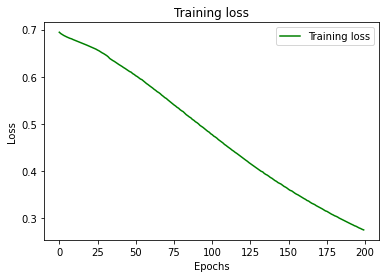

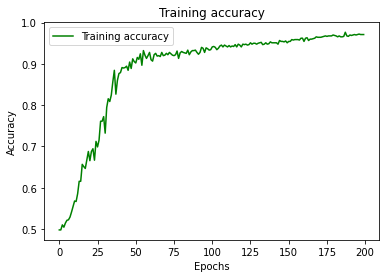

In [11]:
'''Determinar una aproximación en los 200 epochs'''
model = ann3.fit(x_train, y_train, batch_size=16, epochs=200)
plt.plot(model.epoch, model.history["loss"], 'g', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
'''Mostrar training loss'''
plt.show()
plt.plot(model4.epoch, model4.history["accuracy"], 'g', label='Training accuracy')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
'''Mostrar training accuracy'''
plt.show()

In [12]:
'''Evaluar el modelo'''
model_probs = model.predict(test_ds, verbose=0)
'''Para evaluar el modelo, usamos una función de Keras llamada *evaluar* e imprimimos los resultados'''
model_classes = np.argmax(model_probs,axis=1)
'''reduce to 1d array'''
model_probs = model_probs[:, 0]
'''accuracy: (tp + tn) / (p + n)'''
accuracy = accuracy_score(test_labels, model_classes)*100
'''f1: 2 tp / (2 tp + fp + fn)'''
f1 = f1_score(test_labels, model_classes, average='weighted')*100
'''recall: tp / (tp + fn)'''
recall = recall_score(test_labels, model_classes, average='weighted')*100

'''Mostrar los resultados'''
print('Accuracy: %.2f' % accuracy)
print('F1 score: %.2f' % f1)
print('Recall: %.2f' % recall)

Accuracy: 90.39
F1 score: 82.44
Recall: 88.73


Los resultados

# Squeeze Net


In [13]:
'''Definición de variables'''
sq1x1 = "squeeze1x1"
exp1x1 = "expand1x1"
exp3x3 = "expand3x3"
relu = "relu_"

'''Descarga de bases para el modelo'''
WEIGHTS_PATH = "https://github.com/rcmalli/keras-squeezenet/releases/download/v1.0/squeezenet_weights_tf_dim_ordering_tf_kernels.h5"
WEIGHTS_PATH_NO_TOP = "https://github.com/rcmalli/keras-squeezenet/releases/download/v1.0/squeezenet_weights_tf_dim_ordering_tf_kernels_notop.h5"

'''Función modular para Fire Node'''
def fire_module(x, fire_id, squeeze=16, expand=64):
    s_id = 'fire' + str(fire_id) + '/'

    if K.image_data_format() == 'channels_first':
        channel_axis = 1
    else:
        channel_axis = 3
    
    x = Convolution2D(squeeze, (1, 1), padding='valid', name=s_id + sq1x1)(x)
    x = Activation('relu', name=s_id + relu + sq1x1)(x)

    left = Convolution2D(expand, (1, 1), padding='valid', name=s_id + exp1x1)(x)
    left = Activation('relu', name=s_id + relu + exp1x1)(left)

    right = Convolution2D(expand, (3, 3), padding='same', name=s_id + exp3x3)(x)
    right = Activation('relu', name=s_id + relu + exp3x3)(right)

    x = concatenate([left, right], axis=channel_axis, name=s_id + 'concat')
    return x

'''SqueezeNet original de papel.'''
def SqueezeNet(include_top=True, weights='imagenet',
               input_tensor=None, input_shape=None,
               pooling=None,
               classes=1000):
    
    #Crea una instancia de la arquitectura SqueezeNet.
    if weights not in {'imagenet', None}:
        raise ValueError('The `weights` argument should be either '
                         '`None` (random initialization) or `imagenet` '
                         '(pre-training on ImageNet).')

    if weights == 'imagenet' and classes != 1000:
        raise ValueError('If using `weights` as imagenet with `include_top`'
                         ' as true, `classes` should be 1000')


    input_shape = _obtain_input_shape(input_shape,
                                      default_size=227,
                                      min_size=48,
                                      data_format=K.image_data_format(),
                                      require_flatten=include_top)

    if input_tensor is None:
        img_input = Input(shape=input_shape)
    else:
        if not K.is_keras_tensor(input_tensor):
            img_input = Input(tensor=input_tensor, shape=input_shape)
        else:
            img_input = input_tensor


    x = Convolution2D(64, (3, 3), strides=(2, 2), padding='valid', name='conv1')(img_input)
    x = Activation('relu', name='relu_conv1')(x)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), name='pool1')(x)

    x = fire_module(x, fire_id=2, squeeze=16, expand=64)
    x = fire_module(x, fire_id=3, squeeze=16, expand=64)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), name='pool3')(x)

    x = fire_module(x, fire_id=4, squeeze=32, expand=128)
    x = fire_module(x, fire_id=5, squeeze=32, expand=128)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), name='pool5')(x)

    x = fire_module(x, fire_id=6, squeeze=48, expand=192)
    x = fire_module(x, fire_id=7, squeeze=48, expand=192)
    x = fire_module(x, fire_id=8, squeeze=64, expand=256)
    x = fire_module(x, fire_id=9, squeeze=64, expand=256)
    
    # Corte de capas
    if include_top:
        # No es obvio donde cortar la red...
        # Podría hacer la octava o la novena capa... algunos trabajos recomiendan cortar capas anteriores.
    
        x = Dropout(0.5, name='drop9')(x)

        x = Convolution2D(classes, (1, 1), padding='valid', name='conv10')(x)
        x = Activation('relu', name='relu_conv10')(x)
        x = GlobalAveragePooling2D()(x)
        x = Activation('softmax', name='loss')(x)
    else:
        if pooling == 'avg':
            x = GlobalAveragePooling2D()(x)
        elif pooling=='max':
            x = GlobalMaxPooling2D()(x)
        elif pooling==None:
            pass
        else:
            raise ValueError("Unknown argument for 'pooling'=" + pooling)

    # Asegúrese de que el modelo tenga en cuenta
    # cualquier antecesor potencial de `input_tensor`
    
    if input_tensor is not None:
        inputs = get_source_inputs(input_tensor)
    else:
        inputs = img_input

    model = Model(inputs, x, name='squeezenet')

    # load weights
    if weights == 'imagenet':
        if include_top:
            weights_path = get_file('squeezenet_weights_tf_dim_ordering_tf_kernels.h5',
                                    WEIGHTS_PATH,
                                    cache_subdir='models')
        else:
            weights_path = get_file('squeezenet_weights_tf_dim_ordering_tf_kernels_notop.h5',
                                    WEIGHTS_PATH_NO_TOP,
                                    cache_subdir='models')
            
        model.load_weights(weights_path)
        if K.backend() == 'theano':
            layer_utils.convert_all_kernels_in_model(model)

        if K.image_data_format() == 'channels_first':

            if K.backend() == 'tensorflow':
                warnings.warn('You are using the TensorFlow backend, yet you '
                              'are using the Theano '
                              'image data format convention '
                              '(`image_data_format="channels_first"`). '
                              'For best performance, set '
                              '`image_data_format="channels_last"` in '
                              'your Keras config '
                              'at ~/.keras/keras.json.')
    return model

In [15]:
'''Unión del modelo'''
pre_trained_model = SqueezeNet(input_shape=x_train[0].shape, include_top=False, weights="imagenet")

'''Muestra las layer utilizadas en el modelo'''
for layer in pre_trained_model.layers:
    print(layer.name)
    layer.trainable = False

input_1
conv1
relu_conv1
pool1
fire2/squeeze1x1
fire2/relu_squeeze1x1
fire2/expand1x1
fire2/expand3x3
fire2/relu_expand1x1
fire2/relu_expand3x3
fire2/concat
fire3/squeeze1x1
fire3/relu_squeeze1x1
fire3/expand1x1
fire3/expand3x3
fire3/relu_expand1x1
fire3/relu_expand3x3
fire3/concat
pool3
fire4/squeeze1x1
fire4/relu_squeeze1x1
fire4/expand1x1
fire4/expand3x3
fire4/relu_expand1x1
fire4/relu_expand3x3
fire4/concat
fire5/squeeze1x1
fire5/relu_squeeze1x1
fire5/expand1x1
fire5/expand3x3
fire5/relu_expand1x1
fire5/relu_expand3x3
fire5/concat
pool5
fire6/squeeze1x1
fire6/relu_squeeze1x1
fire6/expand1x1
fire6/expand3x3
fire6/relu_expand1x1
fire6/relu_expand3x3
fire6/concat
fire7/squeeze1x1
fire7/relu_squeeze1x1
fire7/expand1x1
fire7/expand3x3
fire7/relu_expand1x1
fire7/relu_expand3x3
fire7/concat
fire8/squeeze1x1
fire8/relu_squeeze1x1
fire8/expand1x1
fire8/expand3x3
fire8/relu_expand1x1
fire8/relu_expand3x3
fire8/concat
fire9/squeeze1x1
fire9/relu_squeeze1x1
fire9/expand1x1
fire9/expand3x3
fire

In [16]:
'''Definición del modelo capa9'''
last_layer = pre_trained_model.get_layer('fire9/concat')
last_output = last_layer.output
x = tf.keras.layers.GlobalMaxPooling2D()(last_output)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(3, activation='sigmoid')(x)
model = tf.keras.Model(pre_trained_model.input, x)

## Train model

In [18]:
'''Entrenamiento del modelo'''
model.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy, metrics=['acc'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 227, 227, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1 (Conv2D)                 (None, 113, 113, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 relu_conv1 (Activation)        (None, 113, 113, 64  0           ['conv1[0][0]']                  
                                )                                                             

 on)                                                                                              
                                                                                                  
 fire5/concat (Concatenate)     (None, 27, 27, 256)  0           ['fire5/relu_expand1x1[0][0]',   
                                                                  'fire5/relu_expand3x3[0][0]']   
                                                                                                  
 pool5 (MaxPooling2D)           (None, 13, 13, 256)  0           ['fire5/concat[0][0]']           
                                                                                                  
 fire6/squeeze1x1 (Conv2D)      (None, 13, 13, 48)   12336       ['pool5[0][0]']                  
                                                                                                  
 fire6/relu_squeeze1x1 (Activat  (None, 13, 13, 48)  0           ['fire6/squeeze1x1[0][0]']       
 ion)     

                                                                                                  
 dropout (Dropout)              (None, 512)          0           ['dense[0][0]']                  
                                                                                                  
 dense_1 (Dense)                (None, 3)            1539        ['dropout[0][0]']                
                                                                                                  
Total params: 986,691
Trainable params: 264,195
Non-trainable params: 722,496
__________________________________________________________________________________________________


In [19]:
'''Caracterización de entrenamiento de valores a entrenar'''
steps_per_epoch = (x_train.shape[0]//batch_size)
validation_steps = (x_val.shape[0] // batch_size)

'''Modelo de finalización'''
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)

In [22]:
'''Inicialización de train'''
start_time = time.time()

'''50 vueltas'''
history = model.fit(x_train, y_train,
    steps_per_epoch=steps_per_epoch,
    epochs = 50,
    validation_data=(x_val, y_val),
    validation_steps=validation_steps,
    batch_size = batch_size,
    callbacks=[es],
    verbose=1)

logging.basicConfig(filename="CNN-basedTL_SqueezeNet_log.txt", level=logging.INFO)
logging.info("Training Execution Time:" + time.strftime("%H:%M:%S", time.gmtime(time.time() - start_time)))

Epoch 1/50
58/58 [==============================] - 12s 193ms/step - loss: 2.3307 - acc: 0.6973 - val_loss: 0.7877 - val_acc: 0.5624
Epoch 2/50
58/58 [==============================] - 11s 188ms/step - loss: 0.8849 - acc: 0.7014 - val_loss: 0.7798 - val_acc: 0.5938
Epoch 3/50
58/58 [==============================] - 10s 173ms/step - loss: 0.7156 - acc: 0.6997 - val_loss: 0.7825 - val_acc: 0.5938
Epoch 4/50
58/58 [==============================] - 10s 172ms/step - loss: 0.7948 - acc: 0.7181 - val_loss: 0.7852 - val_acc: 0.5938
Epoch 5/50
58/58 [==============================] - 11s 185ms/step - loss: 0.7956 - acc: 0.7127 - val_loss: 0.7136 - val_acc: 0.5062
Epoch 6/50
58/58 [==============================] - 10s 176ms/step - loss: 0.7969 - acc: 0.7024 - val_loss: 0.7782 - val_acc: 0.6938
Epoch 7/50
58/58 [==============================] - 10s 177ms/step - loss: 0.7996 - acc: 0.7008 - val_loss: 0.7127 - val_acc: 0.6062
Epoch 8/50
58/58 [==============================] - 12s 201ms/step - 

# Evaluation model

In [25]:
'''Datos estadisticos Finales'''
model_probs = model.predict(x_test,batch_size=batch_size,verbose=0)
y_pred = model_probs
# predict crisp classes for test set
model_classes = np.argmax(model_probs,axis=1)
# reduce to 1d array
model_probs = model_probs[:, 0]

y_test_reduced = np.argmax(y_test,axis=1)
 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test_reduced, model_classes)*100
# recall: tp / (tp + fn)
recall = recall_score(y_test_reduced, model_classes, average='weighted')*100
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test_reduced, model_classes, average='weighted')*100

print('Accuracy: %.2f' % accuracy)
print('F1 score: %.2f' % f1)
print('Recall: %.2f' % recall)

Accuracy: 84.68
F1 score: 71.31
Recall: 79.07


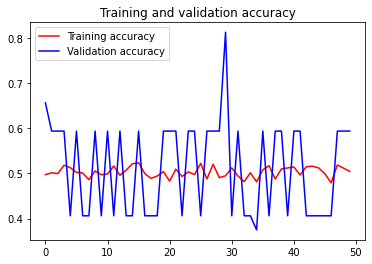

In [26]:
'''Datos de testeo'''
accuracy = history.history['acc']
validation_accuracy = history.history['val_acc']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, validation_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.savefig("Training and validation accuracy - CNN-based TL.png")
plt.show() 

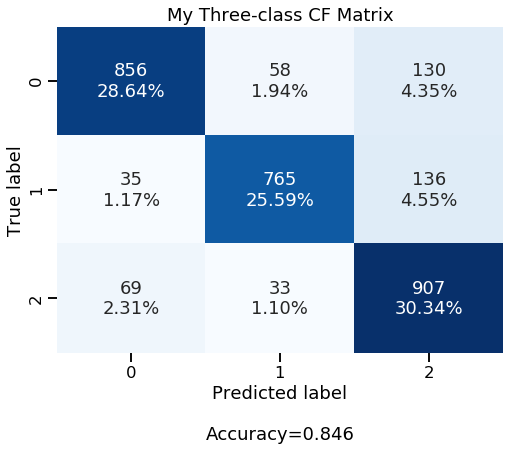

In [30]:
'''Matriz de confusión'''
make_confusion_matrix(cf_matrix_3x3, figsize=(8,6), cbar=False, title='My Three-class CF Matrix')

Los resultados

# One-shot Learning

In [31]:
'''Librerias básicas para One-shot Learning'''
import random
import numpy as np
import keras
import wandb
from wandb.keras import WandbCallback
from keras.models import Sequential, Model
from keras.layers import Flatten, Dense, Concatenate, Dot, Lambda, Input
from keras.datasets import mnist
from keras.optimizers import Adam
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [33]:
'''Hacer parejas'''
def make_pairs(X, y):
    num_classes = max(y) + 1
    digit_indices = [np.where(y == i)[0] for i in range(num_classes)]

    pairs = []
    labels = []

    for idx1 in range(len(X)):
        # agrega un ejemplo coincidente
        x1 = X[idx1]
        label1 = y[idx1]
        idx2 = random.choice(digit_indices[label1])
        x2 = X[idx2]
        
        pairs += [[x1, x2]]
        labels += [1]
    
        # agregar un ejemplo que no coincida
        label2 = random.randint(0, num_classes-1)
        while label2 == label1:
            label2 = random.randint(0, num_classes-1)

        idx2 = random.choice(digit_indices[label2])
        x2 = x[idx2]
        
        pairs += [[x1, x2]]
        labels += [0]

    return np.array(pairs), np.array(labels)

'''Nuevo modelo de entranmiento'''
pairs_train, labels_train = make_pairs(X_train, y_train)
pairs_test, labels_test = make_pairs(X_test, y_test)

1


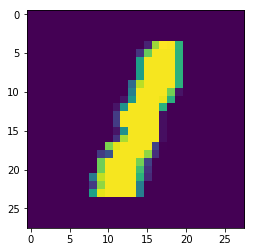

In [34]:
'''echa un vistazo a los datos'''
plt.imshow(pairs_train[300,1])
'''Moto'''
print(labels_train[2])

In [35]:
'''Pesos no compartidos seq1'''
seq1 = Sequential()
seq1.add(Flatten(input_shape=(28,28)))
seq1.add(Dense(128, activation='relu'))
'''Pesos no compartidos seq2'''
seq2 = Sequential()
seq2.add(Flatten(input_shape=(28,28)))
seq2.add(Dense(128, activation='relu'))
'''Preparar modelo'''
merge_layer = Concatenate()([seq1.output, seq2.output])
dense_layer = Dense(1, activation="sigmoid")(merge_layer)
model = Model(inputs=[seq1.input, seq2.input], outputs=dense_layer)

In [36]:
'''Determinar metricas'''
model.compile(loss = "binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
flatten_1_input (InputLayer)    (None, 28, 28)       0                                            
__________________________________________________________________________________________________
flatten_2_input (InputLayer)    (None, 28, 28)       0                                            
__________________________________________________________________________________________________
flatten_1 (Flatten)             (None, 784)          0           flatten_1_input[0][0]            
__________________________________________________________________________________________________
flatten_2 (Flatten)             (None, 784)          0           flatten_2_input[0][0]            
__________________________________________________________________________________________________
dense_1 (D

In [37]:
'''Epoch'''
wandb.init(project="siamese")
model.fit([pairs_train[:,0], pairs_train[:,1]], labels_train[:], batch_size=16, epochs= 10, callbacks=[WandbCallback()])

W&B Run: https://app.wandb.ai/l2k2/siamese/runs/6v1gb888
Call `%%wandb` in the cell containing your training loop to display live results.
Epoch 1/10
120000/120000 [==============================] - 38s 317us/step - loss: 0.6947 - acc: 0.5010
Epoch 2/10
120000/120000 [==============================] - 38s 314us/step - loss: 0.6931 - acc: 0.5054
Epoch 3/10
120000/120000 [==============================] - 38s 317us/step - loss: 0.6930 - acc: 0.5072
Epoch 4/10
120000/120000 [==============================] - 35s 290us/step - loss: 0.6928 - acc: 0.5087
Epoch 5/10
120000/120000 [==============================] - 35s 289us/step - loss: 0.6924 - acc: 0.5082
Epoch 6/10
120000/120000 [==============================] - 35s 289us/step - loss: 0.6920 - acc: 0.5130
Epoch 7/10
120000/120000 [==============================] - 37s 309us/step - loss: 0.6914 - acc: 0.5140
Epoch 8/10
120000/120000 [==============================] - 38s 314us/step - loss: 0.6906 - acc: 0.5168
Epoch 9/10
120000/120000 [===

In [41]:
'''Determinar nuevo modelo de disperción'''
from keras import backend as K
def euclidean_distance(vects):
    X, y = vects
    sum_square = K.sum(K.square(X - y), axis=1, keepdims=True)
    return K.sqrt(K.maximum(sum_square, K.epsilon()))

#Controlar pesos 
input = Input((28,28))
X = Flatten()(input)
X = Dense(128, activation='relu')(X)
dense = Model(input, X)

'''Sobrenetrenamiento'''
input1 = Input((28,28))
input2 = Input((28,28))
dense1 = dense(input1)
dense2 = dense(input2)

'''Nuevos modelos'''
merge_layer = Lambda(euclidean_distance)([dense1,dense2])
dense_layer = Dense(1, activation="sigmoid")(merge_layer)
model = Model(inputs=[input1, input2], outputs=dense_layer)


In [42]:
'''Comprobación de nuevos binarios'''
model.compile(loss = "binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 28, 28)       0                                            
__________________________________________________________________________________________________
input_9 (InputLayer)            (None, 28, 28)       0                                            
__________________________________________________________________________________________________
model_6 (Model)                 (None, 128)          100480      input_8[0][0]                    
                                                                 input_9[0][0]                    
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 1)            0           model_6[1][0]                    
          

In [43]:
'''Comprobar modelo'''
wandb.init(project="siamese")
model.fit([pairs_train[:,0], pairs_train[:,1]], labels_train[:], batch_size=16, epochs=10, callbacks=[WandbCallback()])

W&B Run: https://app.wandb.ai/l2k2/siamese/runs/34u8rkzs
Call `%%wandb` in the cell containing your training loop to display live results.
Epoch 1/10
120000/120000 [==============================] - 39s 324us/step - loss: 0.4544 - acc: 0.7934
Epoch 2/10
120000/120000 [==============================] - 40s 337us/step - loss: 0.3598 - acc: 0.8500
Epoch 3/10
120000/120000 [==============================] - 40s 336us/step - loss: 0.3391 - acc: 0.8585
Epoch 4/10
120000/120000 [==============================] - 41s 344us/step - loss: 0.3251 - acc: 0.8645
Epoch 5/10
120000/120000 [==============================] - 41s 340us/step - loss: 0.3147 - acc: 0.8700
Epoch 6/10
120000/120000 [==============================] - 39s 328us/step - loss: 0.3116 - acc: 0.8714
Epoch 7/10
120000/120000 [==============================] - 36s 303us/step - loss: 0.3099 - acc: 0.8720
Epoch 8/10
120000/120000 [==============================] - 39s 328us/step - loss: 0.3084 - acc: 0.8728
Epoch 9/10
120000/120000 [===

In [44]:
'''Datos estadisticos Finales'''
model_probs = model.predict(x_test,batch_size=batch_size,verbose=0)
y_pred = model_probs
# predict crisp classes for test set
model_classes = np.argmax(model_probs,axis=1)
# reduce to 1d array
model_probs = model_probs[:, 0]

y_test_reduced = np.argmax(y_test,axis=1)
 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test_reduced, model_classes)*100
# recall: tp / (tp + fn)
recall = recall_score(y_test_reduced, model_classes, average='weighted')*100
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test_reduced, model_classes, average='weighted')*100

print('Accuracy: %.2f' % accuracy)
print('F1 score: %.2f' % f1)
print('Precision: %.2f' % precision)
print('Recall: %.2f' % recall)


Accuracy: 87.50
F1 score: 69.98
Recall: 84.65


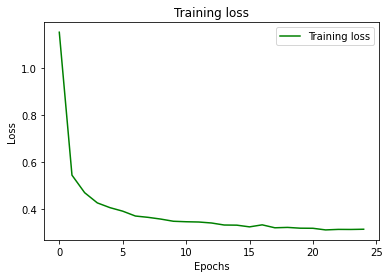

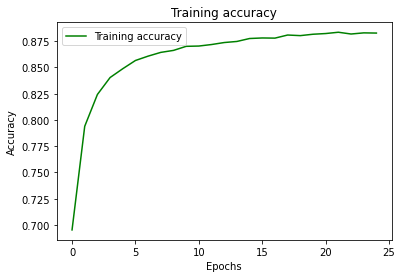

In [45]:
'''Grafica de Epochs'''
plt.plot(model.epoch, model.history["loss"], 'g', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
'''Grafica de Accuracy'''
plt.plot(model.epoch, model.history["accuracy"], 'g', label='Training accuracy')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Los resultados

# Zero-shot Learning


In [1]:
import tensorflow as tf
from tensorflow.keras import backend
from tensorflow.python.framework.ops import disable_eager_execution
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, ReLU, LeakyReLU, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn import preprocessing
from sklearn.neighbors import KDTree
from functools import partial
import numpy as np
import scipy.io

disable_eager_execution()

### Embedded classifier definition

In [11]:
'''Clases a train'''
Class = list()

def custom_kernel_init(shape, dtype=None):
    return Class.T

# Determinación de caracteristica puras de Zero-shot
class EmbeddedClassifier:
    def __init__(self, signatures, input_shape=INPUT_SHAPE, learning_rate=LEARNING_RATE_CLS, beta=BETA):
        self.model = self.__build_model(signatures, input_shape, learning_rate, beta)

    def __build_model(self, signatures, input_shape, learning_rate, beta):
        global CLASS_VECTORS
        CLASS_VECTORS = signatures
        model = Sequential()
        model.add(Dense(signatures.shape[1], input_shape=(input_shape,), activation='relu', kernel_initializer=RandomNormal(stddev=0.02)))
        model.add(Dense(signatures.shape[0], activation='softmax', trainable=False, kernel_initializer=custom_kernel_init))
        print('-----------------------')
        print('Classifier')
        model.summary()
        adam = Adam(lr=learning_rate, beta_1=beta)
        model.compile(loss=SparseCategoricalCrossentropy(from_logits=True), optimizer=adam, metrics=['accuracy'])
        return model

    def get_model(self):
        return self.model

    def train(self, x_train, y_train, n_batch=N_BATCH_CLS, n_epochs=N_EPOCHS_CLS):
        self.model.fit(x_train, y_train, verbose=2, epochs=n_epochs, batch_size=n_batch, shuffle=True)

    def eval(self, x, y, classnames, signatures):
        print()
        inp = self.model.input
        out = self.model.layers[-2].output
        model = Model(inp, out)
        predY = model.predict(x)
        tree = KDTree(signatures)
        top5, top3, top1 = 0, 0, 0
        for i, pred in enumerate(predY):
            pred = np.expand_dims(pred, axis=0)
            dist_5, index_5 = tree.query(pred, k=5)
            # TODO fix index_5 
            pred_labels = [classnames[index] for index in index_5[0]]
            true_label = y[i]
            if true_label in pred_labels:
                top5 += 1
            if true_label in pred_labels[:3]:
                top3 += 1
            if true_label == pred_labels[0]:
                top1 += 1

### Método incrustado

In [12]:
'''Transfer Learning'''
cls = EmbeddedClassifier(signatures)
cls.train(train_seenX, train_seenY)
signatures_eval = signatures if GZSL else signatures[labels['test_unseen'], :]
cls.eval(test_unseenX, test_unseenY, classnames, signatures_eval)
cls.eval(test_seenX, test_seenY, classnames, signatures_eval)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
-----------------------
Classifier
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 85)                174165    
_________________________________________________________________
dense_1 (Dense)              (None, 50)                4300      
Total params: 178,465
Trainable params: 174,165
Non-trainable params: 4,300
_________________________________________________________________
Train on 19832 samples
Epoch 1/25
19832/19832 - 1s - loss: 3.5659 - accuracy: 0.5804
Epoch 2/25
19832/19832 - 1s - loss: 3.2602 - accuracy: 0.8286
Epoch 3/25
19832/19832 - 1s - loss: 3.1773 - accuracy: 0.8687
Epoch 4/25
19832/19832 - 1s - loss: 3.1402 - accuracy: 0.8829
Epoch 5/25
19832/19832 - 1s - loss: 3.1175 - accuracy: 0.8929
Epoch 6/25
19832/19832 - 1s - loss: 3.1013 - accuracy: 0.90

In [44]:
'''Datos estadisticos Finales'''
model_probs = model.predict(x_test,batch_size=batch_size,verbose=0)
y_pred = model_probs
# predict crisp classes for test set
model_classes = np.argmax(model_probs,axis=1)
# reduce to 1d array
model_probs = model_probs[:, 0]

y_test_reduced = np.argmax(y_test,axis=1)
 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test_reduced, model_classes)*100
# recall: tp / (tp + fn)
recall = recall_score(y_test_reduced, model_classes, average='weighted')*100
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test_reduced, model_classes, average='weighted')*100

print('Accuracy: %.2f' % accuracy)
print('F1 score: %.2f' % f1)
print('Recall: %.2f' % recall)

Accuracy: 95.31
F1 score: 89.43
Recall: 91.23


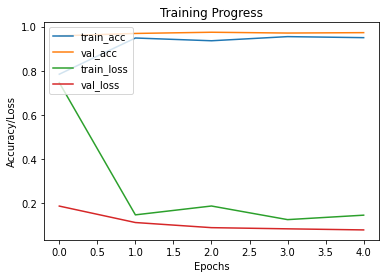

In [14]:
'''Figura de Training process'''
def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.plot(hist.history["loss"])
    plt.plot(hist.history["val_loss"])
    plt.title("Training Progress")
    plt.ylabel("Accuracy/Loss")
    plt.xlabel("Epochs")
    plt.legend(["train_acc", "val_acc", "train_loss", "val_loss"], loc="upper left")
    plt.show()

plot_hist(history)

DEDUCCION